# Проект - Монетизация игрового приложения «Космические братья»

## 1. Откроем файлы с данными и изучим общую информацию

Загружаем библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from plotly import graph_objects as go 
import seaborn as sns

from scipy import stats as st


Загружаем данные о затратах, действиях пользователей и источников пользователей из CSV-файлов в переменные:

In [2]:
ad_costs = pd.read_csv('/datasets/ad_costs.csv')
game_actions = pd.read_csv('/datasets/game_actions.csv')
user_source = pd.read_csv('/datasets/user_source.csv')

Изучим общую информацию:

In [3]:
ad_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  28 non-null     object 
 1   day     28 non-null     object 
 2   cost    28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes


In [4]:
ad_costs.head(5)

,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796


In [5]:
ad_costs.describe()

,cost
count,28.000000
mean,271.556321
std,286.867650
min,23.314669
25%,66.747365
50%,160.056443
75%,349.034473
max,969.139394


In [6]:
game_actions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135640 non-null  object
 1   event           135640 non-null  object
 2   building_type   127957 non-null  object
 3   user_id         135640 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 5.2+ MB


In [7]:
game_actions.describe()

,event_datetime,event,building_type,user_id,project_type
count,135640,135640,127957,135640,1866
unique,128790,3,3,13576,1
top,2020-05-10 03:08:18,building,spaceport,d6aca06a-cd75-4cd8-b8cd-240a3c163884,satellite_orbital_assembly
freq,4,127957,59325,22,1866


In [8]:
game_actions.head(5)

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN


In [9]:
user_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13576 non-null  object
 1   source   13576 non-null  object
dtypes: object(2)
memory usage: 212.2+ KB


In [10]:
user_source.head(5)

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads


In [11]:
user_source.describe()

,user_id,source
count,13576,13576
unique,13576,4
top,e8a8e26a-6ef0-4173-ae08-d907d4cacb14,yandex_direct
freq,1,4817


## 2. Подготовим данные

Проверим пропуски:

In [12]:
ad_costs.isna().sum()

source    0
day       0
cost      0
dtype: int64

In [13]:
game_actions.isna().sum()

event_datetime         0
event                  0
building_type       7683
user_id                0
project_type      133774
dtype: int64

In [14]:
user_source.isna().sum()

user_id    0
source     0
dtype: int64

Проверим, если ли в таблице 'building' без 'building_type':

In [15]:
game_actions[game_actions['event'] == 'building']['building_type'].isna().sum()

0

Проверим, если ли в таблице 'project' со значением  'building_type':

In [16]:
game_actions[game_actions['event'] == 'project'].count()

event_datetime    1866
event             1866
building_type        0
user_id           1866
project_type      1866
dtype: int64

Проверим, если ли в таблице 'project' без 'project_type':

In [17]:
game_actions[game_actions['event'] == 'project']['project_type'].isna().sum()

0

Проверим, если ли в таблице 'building' со значением 'project_type':

In [18]:
game_actions[game_actions['event'] == 'building'].count()

event_datetime    127957
event             127957
building_type     127957
user_id           127957
project_type           0
dtype: int64

В данных нет:
- Зданий без типов зданий и проектов с типом здания
- Проектов без типа проекта и зданий с типом проекта

2. Исследуем данные на дубликаты

In [19]:
ad_costs.duplicated().sum()

0

In [20]:
game_actions.duplicated().sum()

1

In [21]:
game_actions = game_actions.drop_duplicates().reset_index(drop=True) 

In [22]:
user_source.duplicated().sum()

0

Вывод: В таблице game_actions нашелся один дубликат, я его удалил

3. Меняем тип данных, если требуется

In [23]:
game_actions['event_datetime'] = pd.to_datetime(game_actions['event_datetime'])

## 3. Изучим и проверим данные

1. Сколько всего событий в логе?

In [24]:
(game_actions['event'].count())

135639


2. Сколько всего пользователей в логе?

In [25]:
(game_actions['user_id'].nunique())

13576

3. Сколько в среднем событий приходится на пользователя?

Среднее:

In [26]:
print (game_actions['event'].count() / game_actions['user_id'].nunique())

9.991087212728344


Медиана:

In [27]:
game_actions.groupby('user_id')['event'].count().median()

10.0

Вывод: Среднее значение и медиана практически одинаковы

Проверим выбросы

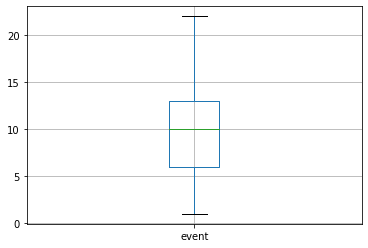

In [28]:
users_actions = game_actions.pivot_table(index = 'user_id', values = 'event', aggfunc = 'count').boxplot()

In [29]:
np.percentile(game_actions.pivot_table(index = 'user_id', values = 'event', aggfunc = 'count'), [1, 99])

array([ 2., 19.])

In [30]:
game_actions.pivot_table(index = 'user_id', values = 'event', aggfunc = 'count').sort_values(by ='event', ascending=False)

,event
user_id,
d6aca06a-cd75-4cd8-b8cd-240a3c163884,22
ff841992-d93b-462e-bc6e-18c24a514f36,22
bf542075-e3a2-4e79-82d8-3838e86d2a25,22
45935e5d-8f50-4176-83d3-fd545bb2015f,21
94844e06-0352-4048-9e62-1db7718f804c,21
...,...
fcefbdaa-5f8b-49a6-91f3-8c09e0a94a5d,1
b9d266a0-7741-49ba-9125-134c5969f8d1,1
ded24248-15c7-4037-9092-f64fcaa651e7,1


Вывод: Число событий для пользователя от 1 до 22

4. Данными за какой период вы располагаете? Найдите максимальную и минимальную дату 

In [31]:
game_actions['event_datetime'].min()

Timestamp('2020-05-04 00:00:01')

In [32]:
game_actions['event_datetime'].max()

Timestamp('2020-06-05 12:32:49')

## 4. Исследовательский анализ данных


### 1. Посмотрим количество событий по датам. Каков процент прохождения уровня? Посчитаем, сколько пользователей совершали каждое из этих событий. Отсортируем события по числу пользователей. Посчитаем долю пользователей, которые хоть раз совершали событие.

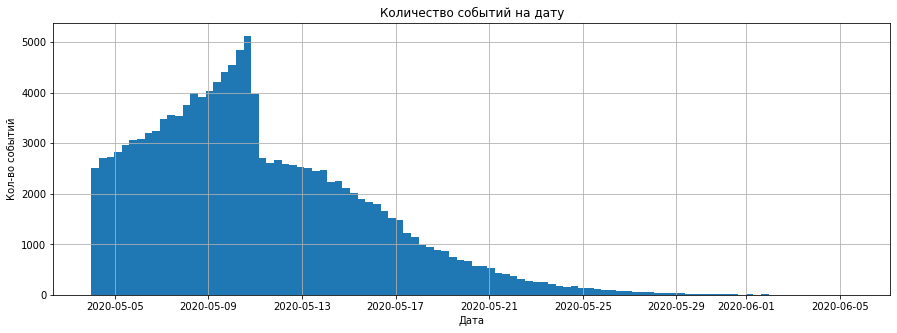

In [33]:
game_actions['event_datetime'].hist(bins = 100, figsize=(15, 5)) 
plt.xlabel('Дата')
plt.ylabel('Кол-во событий')
plt.title('Количество событий на дату');

Вывод: Располагаем периодом с 2020-05-04 00:00:01 по 2020-06-05 12:32:49. Заметен рост и падение количества событий. Сделаем срез данных для более детального рассмотрения

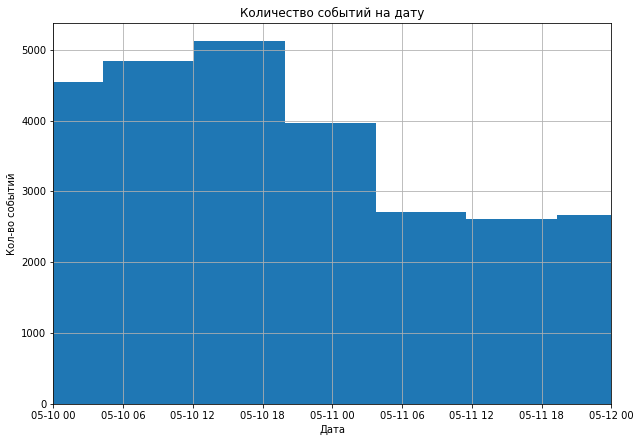

In [34]:
game_actions['event_datetime'].hist(bins = 100, figsize=(10, 7)) 
plt.xlim(pd.to_datetime('2020-05-10'), pd.to_datetime('2020-05-12'))
plt.xlabel('Дата')
plt.ylabel('Кол-во событий')
plt.title('Количество событий на дату');

11 мая видно заметное падение количества событий

Проверим, сколько пользователей совершали определенное событие:

In [35]:
new_users = game_actions['user_id'].nunique()
events_users = game_actions.groupby('event').agg({'event':'count', 'user_id':'nunique'}).sort_values(by='user_id', ascending=False)
events_users.columns = ['n_events', 'users']
events_users = events_users.reset_index()
events_users['users_part_event'] = (events_users['users'] / new_users * 100).round(1) # доля хотя бы раз совершивших событие
events_users

,event,n_events,users,users_part_event
0,building,127956,13576,100.0
1,finished_stage_1,5817,5817,42.8
2,project,1866,1866,13.7


Всего пользователей 13576, из них 5817 закончили первый уровень, а 1866 завершили проект

### 2. Проанализируем каналы привлечения пользователей, затраты на привлечение пользователей.

Проанализируем распределение стоимости рекламы по времени:

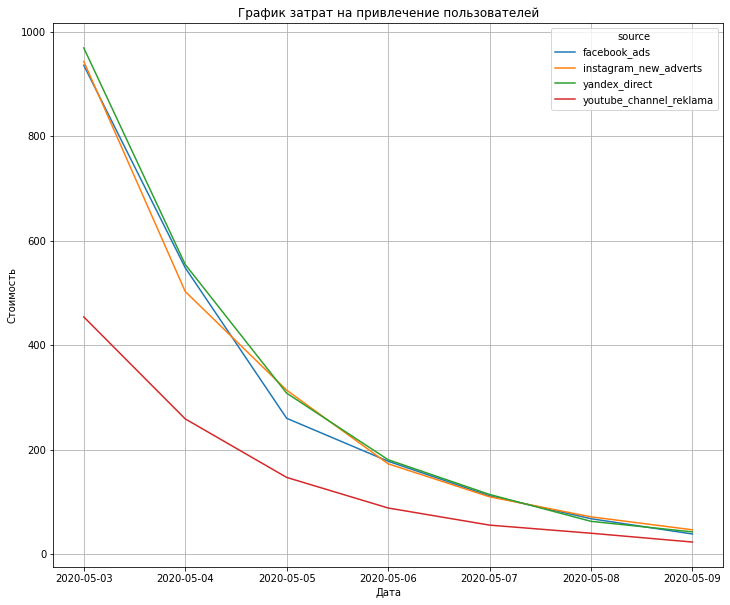

In [37]:
filtered_costs = ad_costs.pivot_table(
        index='day', columns='source', values='cost', aggfunc='sum'
    )
filtered_costs.plot(                                             
           figsize=(12, 10),
           grid=True,)

plt.title('График затрат на привлечение пользователей')
plt.xlabel('Дата')
plt.ylabel('Стоимость')
plt.show()

In [38]:
mon = ad_costs.groupby(['day', 'source'], \
                      as_index = False)[['cost']].sum()
print(mon)


           day                   source        cost
0   2020-05-03             facebook_ads  935.882786
1   2020-05-03    instagram_new_adverts  943.204717
2   2020-05-03            yandex_direct  969.139394
3   2020-05-03  youtube_channel_reklama  454.224943
4   2020-05-04             facebook_ads  548.354480
5   2020-05-04    instagram_new_adverts  502.925451
6   2020-05-04            yandex_direct  554.651494
7   2020-05-04  youtube_channel_reklama  259.073224
8   2020-05-05             facebook_ads  260.185754
9   2020-05-05    instagram_new_adverts  313.970984
10  2020-05-05            yandex_direct  308.232990
11  2020-05-05  youtube_channel_reklama  147.041741
12  2020-05-06             facebook_ads  177.982200
13  2020-05-06    instagram_new_adverts  173.071145
14  2020-05-06            yandex_direct  180.917099
15  2020-05-06  youtube_channel_reklama   88.506074
16  2020-05-07             facebook_ads  111.766796
17  2020-05-07    instagram_new_adverts  109.915254
18  2020-05-

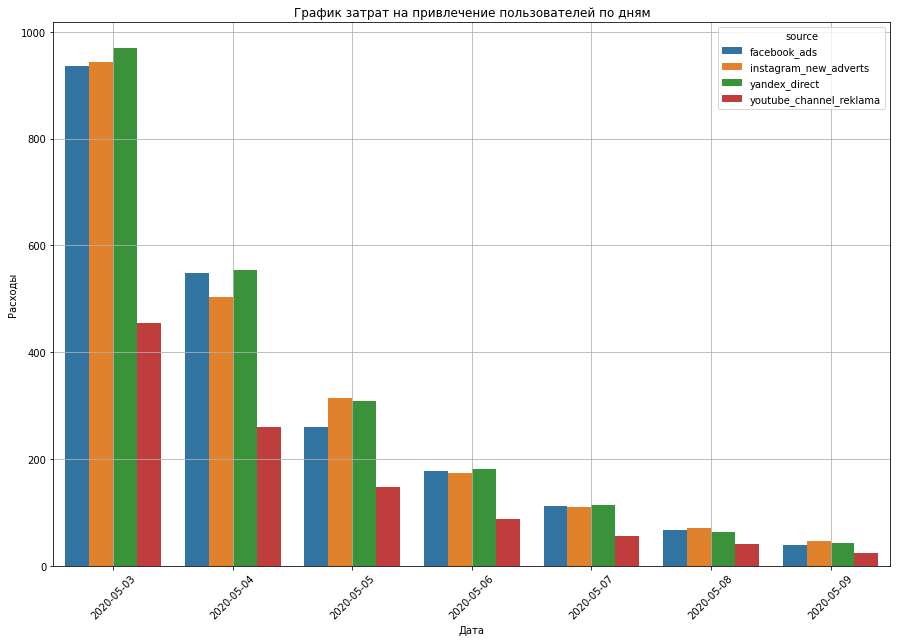

In [39]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(x='day', y='cost', data=ad_costs, hue='source')
plt.title('График затрат на привлечение пользователей по дням')
plt.xlabel('Дата')
plt.ylabel('Расходы')
plt.grid()
plt.xticks(rotation=45)
plt.show()

Чем дальше по времени, тем ниже затраты на рекламу для всех каналов

Затраты по каналам:

In [40]:
source_cost = ad_costs.groupby('source')['cost'].sum().sort_values(ascending=False).reset_index()
source_cost

,source,cost
0,yandex_direct,2233.111449
1,instagram_new_adverts,2161.441691
2,facebook_ads,2140.904643
3,youtube_channel_reklama,1068.119204


Обьединим 2 таблицы по User_id:

In [41]:

players = game_actions.merge(user_source, left_on='user_id', right_on='user_id')
players['event_datetime'] = pd.to_datetime(players['event_datetime'])

Привлеченные пользователи в зависимости от канала:

In [42]:
source_users = players.groupby('source')['user_id'].nunique().sort_values(ascending=False).reset_index()
players

,event_datetime,event,building_type,user_id,project_type,source
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,youtube_channel_reklama
1,2020-05-05 05:20:15,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,youtube_channel_reklama
2,2020-05-05 19:24:02,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,youtube_channel_reklama
3,2020-05-05 20:59:19,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,youtube_channel_reklama
4,2020-05-06 00:52:56,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,youtube_channel_reklama
...,...,...,...,...,...,...
135634,2020-05-13 23:56:39,building,spaceport,cafd1b8b-507b-49ae-abf0-89fe863a8b03,NaN,facebook_ads
135635,2020-05-18 00:23:28,building,spaceport,cafd1b8b-507b-49ae-abf0-89fe863a8b03,NaN,facebook_ads
135636,2020-05-10 23:59:52,building,assembly_shop,bdc53e19-462a-4dc3-8b55-b4a34278af6a,NaN,youtube_channel_reklama
135637,2020-05-13 08:11:19,building,spaceport,bdc53e19-462a-4dc3-8b55-b4a34278af6a,NaN,youtube_channel_reklama


In [43]:
source_users

,source,user_id
0,yandex_direct,4817
1,instagram_new_adverts,3347
2,facebook_ads,2726
3,youtube_channel_reklama,2686


Средняя стоимость привлечения одного пользователя:

In [44]:
source_users['cost_per_user'] = source_cost['cost'] / source_users['user_id']
source_users

,source,user_id,cost_per_user
0,yandex_direct,4817,0.463590
1,instagram_new_adverts,3347,0.645785
2,facebook_ads,2726,0.785365
3,youtube_channel_reklama,2686,0.397662


In [45]:
source_users.mean()

user_id          3394.0000
cost_per_user       0.5731
dtype: float64

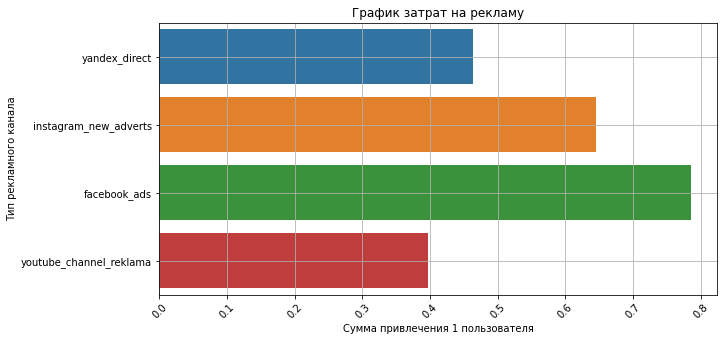

In [46]:
plt.figure(figsize=(10, 5))
sns.barplot(x='cost_per_user', y='source', data=source_users)
plt.title('График затрат на рекламу')
plt.xlabel('Сумма привлечения 1 пользователя')
plt.ylabel('Тип рекламного канала')
plt.grid()
plt.xticks(rotation=45)
plt.show()

Посмотрим сколько пользователей пришли из различных источников:

In [47]:
pls = players.groupby(['source'], \
                      as_index = False)[['user_id']].nunique().sort_values(by='user_id', ascending=False)
print(pls)

                    source  user_id
2            yandex_direct     4817
1    instagram_new_adverts     3347
0             facebook_ads     2726
3  youtube_channel_reklama     2686


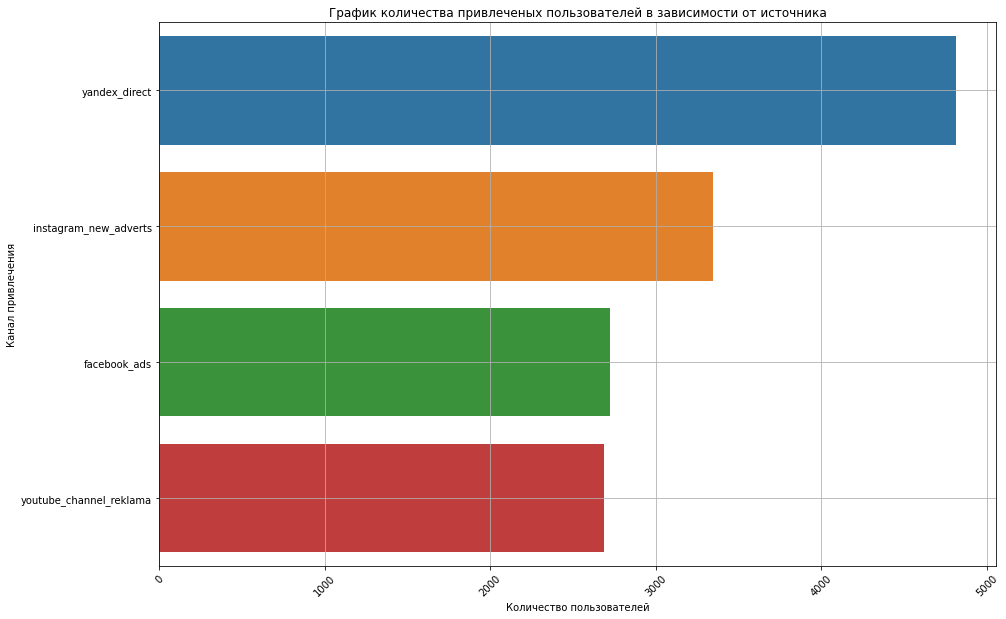

In [48]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(x='user_id', y='source', data=pls)
plt.title('График количества привлеченых пользователей в зависимости от источника')
plt.xlabel('Количество пользователей')
plt.ylabel('Канал привлечения')
plt.grid()
plt.xticks(rotation=45)
plt.show()

С каждого пользователя мы получили 0.07 за каждый просмотр(событие)

In [49]:
print ()

print ('Всего у нас', game_actions['building_type'].count(), 'событий постройки зданий')


Всего у нас 127956 событий постройки зданий


In [50]:
total_z = (game_actions['building_type'].count()) * 0.07
print ('Заработано на пользователях:', total_z)

Заработано на пользователях: 8956.92


In [51]:
total_t = ad_costs['cost'].sum()
print ('Потрачено на привлечение:', total_t)

Потрачено на привлечение: 7603.576986788023


In [52]:
total = total_z - total_t
print ('Итоговый доход:', total)

Итоговый доход: 1353.3430132119774


В целом рекламная компания вышла в плюс - заработано 1353 условных единиц.(Все это без учета стоимости разработки и поддержки самого приложения) 
Затраты на привлечение одного пользователя (в порядке возрастания):
1) Youtube
2) Yandex
3) Instagram
4) Facebook

Найдем минимальную и максимальную дату событий, и срок активности для пользователей:

In [53]:
df_grouped = players.groupby(['user_id']).agg(
    date_min=('event_datetime', 'min'),
    date_max=('event_datetime', 'max'))\
    .reset_index()
df_grouped['game_time']=(df_grouped['date_max']-df_grouped['date_min'])
players = pd.merge(players, df_grouped)
players['game_days'] = players['game_time'].dt.days
players.head()

,event_datetime,event,building_type,user_id,project_type,source,date_min,date_max,game_time,game_days
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,youtube_channel_reklama,2020-05-04 00:00:01,2020-05-10 20:27:01,6 days 20:27:00,6
1,2020-05-05 05:20:15,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,youtube_channel_reklama,2020-05-04 00:00:01,2020-05-10 20:27:01,6 days 20:27:00,6
2,2020-05-05 19:24:02,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,youtube_channel_reklama,2020-05-04 00:00:01,2020-05-10 20:27:01,6 days 20:27:00,6
3,2020-05-05 20:59:19,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,youtube_channel_reklama,2020-05-04 00:00:01,2020-05-10 20:27:01,6 days 20:27:00,6
4,2020-05-06 00:52:56,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,youtube_channel_reklama,2020-05-04 00:00:01,2020-05-10 20:27:01,6 days 20:27:00,6


Разделим датасет на 3 части - 
- игроки, прошедшие уровень победой над противником 
- игроки, прошедшие уровень созданием проекта
- игроки, которые не прошли уровень

In [54]:
#фильтруем игроков прошедших уровень победой над противником
players_finish = players[players['user_id'].isin(players[players['event']== 'finished_stage_1']['user_id'])]
players_finish = players_finish[~players_finish['user_id'].isin(players_finish[players_finish['event']== 'project']['user_id'])]

In [55]:
#фильтруем играков прошедших уровень созданием проекта
players_project = players[players['user_id'].isin(players[players['event']== 'project']['user_id'])]

In [56]:
#фильтруем игроков не прошедших уровень
players_not_finish = players[~players['user_id'].isin(players[players['event']== 'finished_stage_1']['user_id'])]


In [57]:
players_finish['user_id'].nunique()

3951

In [58]:
players_project['user_id'].nunique()

1866

In [59]:
players_not_finish['user_id'].nunique()

7759

### 3. Проанализируем активность пользователей и постройки в игре.

In [60]:
plb = players.groupby(['building_type'], \
                      as_index = False)[['user_id']].nunique().sort_values(by='user_id', ascending=False)
print(plb)

     building_type  user_id
0    assembly_shop    13576
2        spaceport    13231
1  research_center     7671


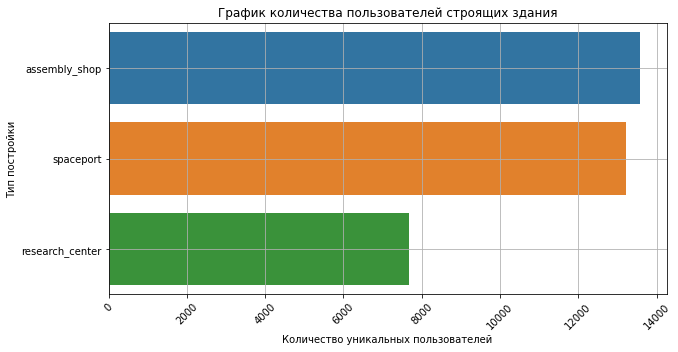

In [61]:
plt.figure(figsize=(10, 5))
sns.barplot(x='user_id', y='building_type', data=plb)
plt.title('График количества пользователей строящих здания')
plt.xlabel('Количество уникальных пользователей')
plt.ylabel('Тип постройки')
plt.grid()
plt.xticks(rotation=45)
plt.show()

Сборочный цех строили больше всего(все пользователи), немного отстает космопорт. Исследовательский центр строили меньшее количество раз

Построим график количества событий по дням:

In [62]:
players['event_day'] = players['event_datetime'].dt.date

In [63]:
pls = players.groupby(['event_day', 'event'], \
                      as_index = False)[['user_id']].nunique()

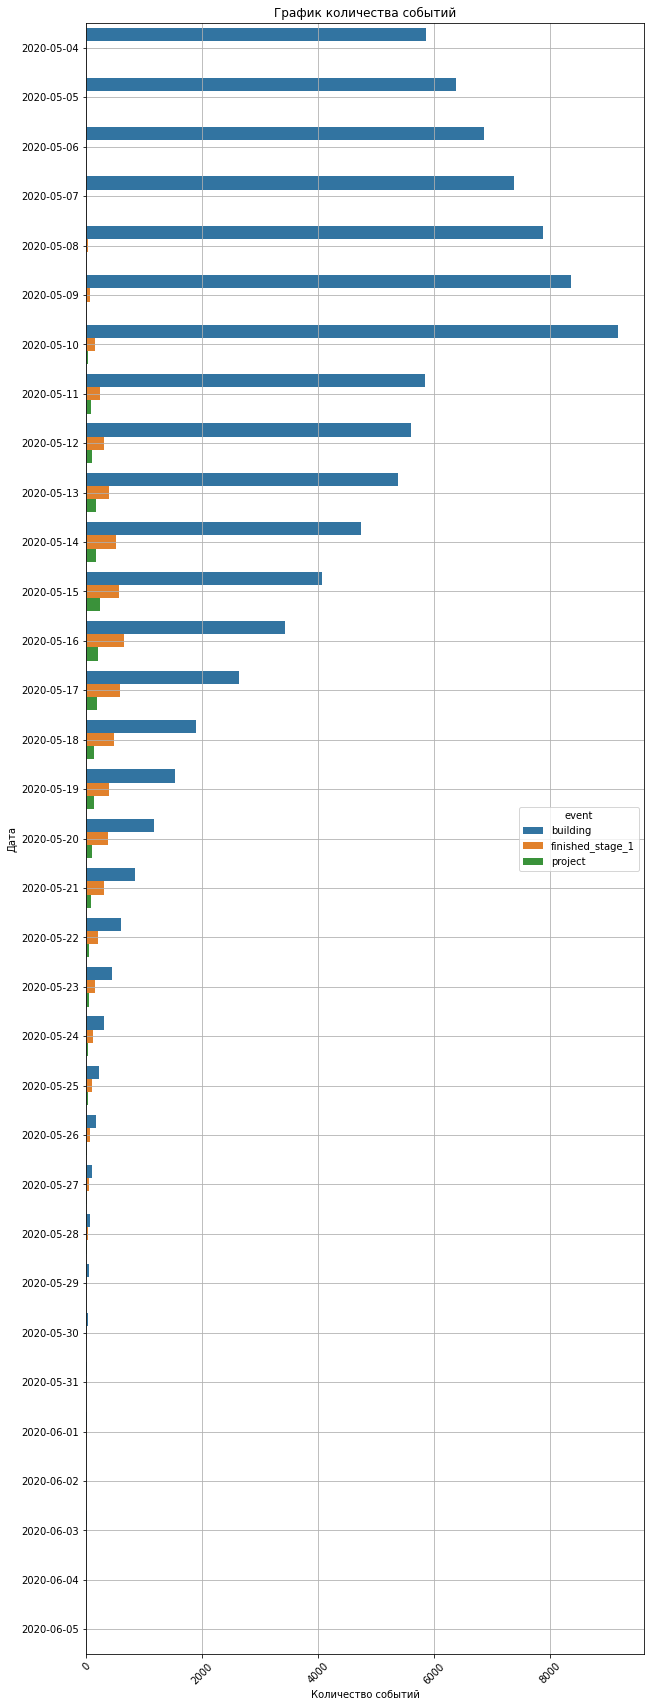

In [64]:
plt.figure(figsize=(10, 30))
sns.barplot(x='user_id', y='event_day', data=pls, hue='event')
plt.title('График количества событий')
plt.xlabel('Количество событий')
plt.ylabel('Дата')
plt.grid()
plt.xticks(rotation=45)
plt.show()

### 4. Проверка гепотез

#### 4.1 Проверим гипотезу различия времени прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком.

Построим графики для двух групп:

In [65]:
p_f = players_finish.groupby(['game_days'], \
                      as_index = False)[['user_id']].nunique()


p_p = players_project.groupby(['game_days'], \
                      as_index = False)[['user_id']].nunique()


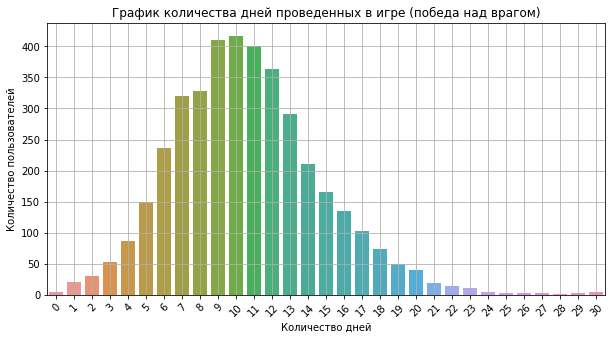

In [66]:
plt.figure(figsize=(10, 5))
sns.barplot(x='game_days', y='user_id', data=p_f)
plt.title('График количества дней проведенных в игре (победа над врагом)')
plt.xlabel('Количество дней')
plt.ylabel('Количество пользователей')
plt.grid()
plt.xticks(rotation=45)
plt.show()

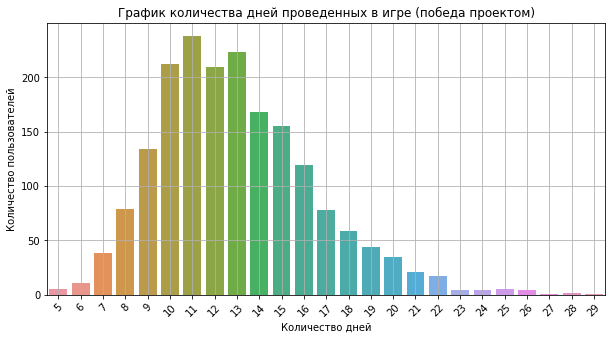

In [67]:
plt.figure(figsize=(10, 5))
sns.barplot(x='game_days', y='user_id', data=p_p)
plt.title('График количества дней проведенных в игре (победа проектом)')
plt.xlabel('Количество дней')
plt.ylabel('Количество пользователей')
plt.grid()
plt.xticks(rotation=45)
plt.show()

- За нулевую гипотезу возьмём что: "статистической значимости различий в среднем времени прохождения между 2 группами нет"; 

- Альтернативная гипотеза будет гласить - статистически значимые различия есть.


In [68]:
players_finish['game_time'] = players_finish['game_time'].astype('timedelta64[s]')
players_project['game_time'] = players_project['game_time'].astype('timedelta64[s]')



/tmp/ipykernel_48/3692077610.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [69]:
finish_win1 = players_finish.groupby('user_id')['game_time'].unique().reset_index()
project_win1 = players_project.groupby('user_id')['game_time'].unique().reset_index()                           



finish_win1 = list(finish_win1['game_time'])
project_win1 = list(project_win1['game_time']) 


In [70]:
alpha = .05

results = st.ttest_ind(finish_win1, project_win1, equal_var = False)

print('p-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-value: [5.70805824e-107]
Отвергаем нулевую гипотезу


Статистически значимые различия во времени прохождения между 2 группами присутствуют

#### 4.2 Проверим гипотезу различия среднего количества построек между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком.

- За нулевую гипотезу возьмём что: "статистической значимости среднего количества построек между 2 группами нет"; 

- Альтернативная гипотеза будет гласить - статистически значимые различия есть.


In [71]:
finish_win2 = players_finish.groupby('user_id')['building_type'].count().reset_index()
project_win2 = players_project.groupby('user_id')['building_type'].count().reset_index()                           



finish_win2 = list(finish_win2['building_type'])
project_win2 = list(project_win2['building_type']) 


In [72]:
alpha = .05

results = st.ttest_ind(finish_win2, project_win2, equal_var = False)

print('p-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-value: 0.0
Отвергаем нулевую гипотезу


Статистически значимые различия по количеству посторек между 2 группами присутствуют

### 5. Сформируем модель монетизации игрового приложения. Оценим как она удовлетворяет требованиям заказчика, то есть окупает расходы на маркетинг.

#### Модель №1. Текущая модель:

In [183]:
#Количество построек на пользователя:
buldings_per_user = players.groupby(['user_id']).agg({'building_type': 'count'}).values


In [184]:
print('Прибыль от рекламы в текущей модели: {0}'.format(round(0.07 * 
                                                                       buldings_per_user.sum() -
                                                                       ad_costs['cost'].sum(), 0))
     )

Прибыль от рекламы в текущей модели: 1353.0


#### Модель №2. Альтернативная модель:

За альтернативную модель я взял отказ от демонстрации рекламы всем пользователям при выборе первой постройки:

In [185]:
print('Прибыль от рекламы в альтернативной модели: {0}'.format(round(0.07 *
                                                                                (buldings_per_user.sum() -
                                                                                 players['user_id'].nunique()) -
                                                                                ad_costs['cost'].sum(), 0))
     )

Прибыль от рекламы в альтернативной модели: 403.0


Потенциальная прибыль уменьшилась примерно на 70%, но все еще остается в плюсе. Приложение будет приносить доход, но количество показов рекламы сократится

#### Модель №3. Убыточная модель:

За альтернативную модель №2 взял отказ от демонстрации рекламы всем пользователям при выборе двух первых построек:

In [219]:
#Оставим пользователей с 2 и более постройками:
buldings_per_user2 = players.groupby(['user_id']).agg({'building_type': 'count'}).query('building_type >= 2')
buldings_per_user2 = buldings_per_user2.count().values


In [220]:
print('Прибыль от рекламы в модели с убытками: {0}'.format(0.07 *
                                                                                (buldings_per_user.sum() -
                                                                                 (buldings_per_user2 + players['user_id'].nunique())) -
                                                                                ad_costs['cost'].sum(),)
     )

Прибыль от рекламы в модели с убытками: [-543.30698679]


При отсутствии рекламы на 2 экранах постройки мы уходим в минус

# Выводы:

Проведен анализ данных в игре «Космические братья»

Выявлены следующие числовые показатели:

- Количество событий: 135640


- Количество пользователей: 13576. Из них прошли первый уровень 5817:  1866 закончили проект, 3951 завершили победой над противником


- Среднее и медианное количество событий на пользователя примерно равно 10


- Временной интервал для анализа: c 2020-05-04 по 2020-06-05


- Всего 4 источника трафика - Я.Директ, Instagram, Facebook, Youtube. Большая часть пришла из Yandex Direct, меньшая - из Youtube. Затраты на привлечение одного пользователя (в порядке возрастания):

1) Youtube

2) Yandex

3) Instagram

4) Facebook









Далее я проверил гипотезу различия времени прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком. Было выяснено, что статистически значимые различия во времени прохождения между 2 группами все же присутствуют. 

Аналогичный анализ провел между 2 группами по среднему количеству построек.
Также присутствуют различия по количеству посторек между 2 группами.

# Модель монетизации:

Текущая модель монетизации в целом окупает себя, но там двольно много рекламы, что может отпугнуть игроков. За альтернативную модель монетизации я взял отказ от демонстрации рекламы всем пользователям при выборе первой постройки. Потенциальная прибыль хоть и уменьшилась на 70%, но все еще остается в плюсе, а количество рекламы сократилось. 

В целом рекомендую использовать Модель №2




Презентация - https://cloud.mail.ru/public/CEp1/n1t8d8pyr

Дашборд - https://public.tableau.com/app/profile/slav1182/viz/Vipusk/Dashboard1?publish=yes